## logistic regression

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


/Users/rena/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


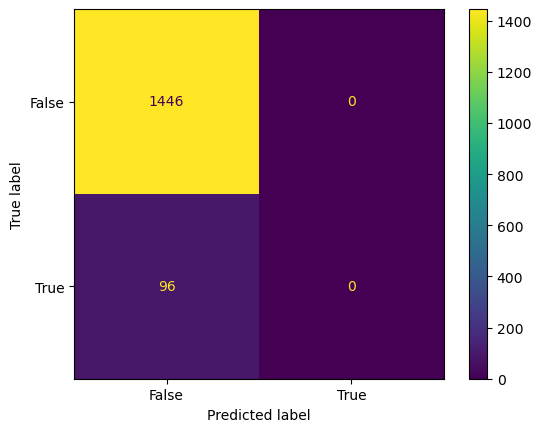

Accuracy: 0.9377431906614786
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


/Users/rena/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted)